In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller,kpss
from sklearn.linear_model import LinearRegression

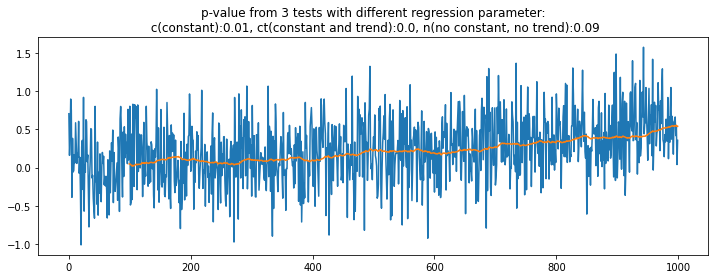

In [2]:
total_len = 1000
slope = 0.0005

np.random.seed(0)
y = np.random.normal(0,0.4, total_len) + np.linspace(0, total_len*slope, total_len)

plt.figure(figsize=[12, 4]) 
plt.plot(y)
plt.plot(pd.Series(y).rolling(100).mean().dropna())
plt.title(f"p-value from 3 tests with different regression parameter:\n c(constant):{round(adfuller(y)[1],2)}, ct(constant and trend):{round(adfuller(y,regression='ct')[1],2)}, n(no constant, no trend):{round(adfuller(y,regression='n')[1],2)}")
plt.show()

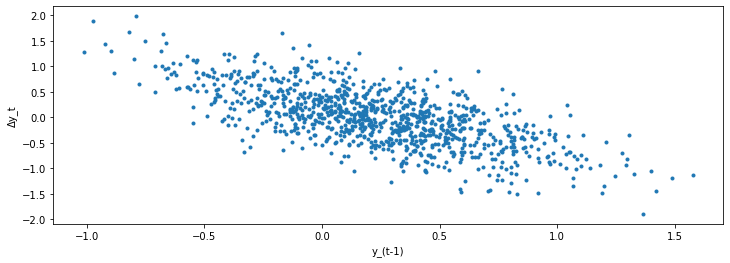

In [3]:
plt.figure(figsize=[12, 4]) 
train_X = y[:-1].reshape(-1,1)
train_y = pd.Series(y).diff().dropna().values
plt.plot(train_X,train_y,'.')
plt.ylabel('Δy_t')
plt.xlabel('y_(t-1)')
plt.show()

[-0.90722243] 0.2099198457740047


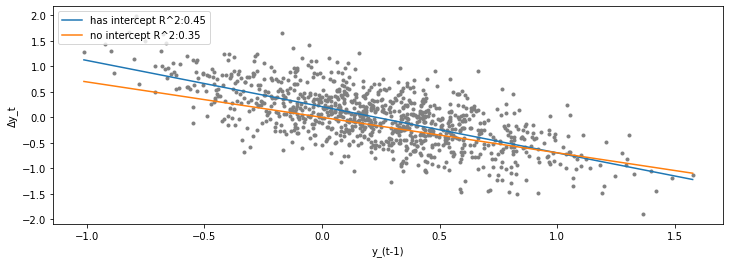

In [4]:
plt.figure(figsize=[12, 4]) 

plt.plot(train_X,train_y,'.',color='grey')
reg = LinearRegression().fit(train_X, train_y)
plt.plot([min(y[:-1]),max(y[:-1])],
         [min(y[:-1])*reg.coef_+reg.intercept_, max(y[:-1])*reg.coef_+reg.intercept_], 
         label=f'has intercept R^2:{round(reg.score(train_X, train_y),2)}')

print(reg.coef_, reg.intercept_)

reg = LinearRegression(fit_intercept=False).fit(train_X, train_y)
plt.plot([min(y[:-1]),max(y[:-1])],
         [min(y[:-1])*reg.coef_+reg.intercept_, max(y[:-1])*reg.coef_+reg.intercept_], 
         label=f'no intercept R^2:{round(reg.score(train_X, train_y),2)}')

plt.legend(loc='upper left')
plt.ylabel('Δy_t')
plt.xlabel('y_(t-1)')
plt.show()

### ADF and linear regression

In [5]:
adfuller(y,store=True,regression='c')[-1].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     59.37
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          6.78e-137
Time:                        22:47:31   Log-Likelihood:                -485.09
No. Observations:                 983   AIC:                             1006.
Df Residuals:                     965   BIC:                             1094.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2505      0.072     -3.457      0.001      -0.393      -0.108
x2            -0.7544      0.076     -9.960      0.000      -0.903      -0.606
x3            -0.7115      0.079     -9.026      0.000      -0.866      -0.557
x4            -0.6356      0.081     -7.838      0.000      -0.795      -0.476
x5            -0.6480      0.082     -7.878      0.000      -0.809      -0.487
x6            -0.6295      0.083     -7.598      0.000      -0.792      -0.467
x7            -0.6134      0.083     -7.386      0.000      -0.776      -0.450
x8            -0.4886      0.083     -5.887      0.000      -0.652      -0.326
x9            -0.4314      0.082     -5.263      0.000      -0.592      -0.271
x10           -0.3735      0.080     -4.666      0.000      -0.531      -0.216
x11           -0.3541      0.077     -4.589      0.000      -0.506      -0.203
x12           -0.3383      0.073     -4.655      0.000      -0.481      -0.196
x13           -0.3081      0.068     -4.564      0.000      -0.441      -0.176
x14           -0.2174      0.062     -3.528      0.000      -0.338      -0.096
x15           -0.1457      0.055     -2.652      0.008      -0.254      -0.038
x16           -0.0901      0.046     -1.980      0.048      -0.179      -0.001
x17           -0.0530      0.032     -1.650      0.099      -0.116       0.010
const          0.0596      0.021      2.849      0.004       0.019       0.101
==============================================================================
Omnibus:                        0.596   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.682
Skew:                           0.026   Prob(JB):                        0.711
Kurtosis:                       2.881   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
train = pd.DataFrame({'y':y})
train['delta_y'] = train['y'].diff()
train['y_1'] = train['y'].shift(1)
for i in range(1,17):
    train[f'delta_y_{i}'] = train['delta_y'].shift(i)
train = train.dropna()

train_X = train[[x for x in train.columns if x not in ['delta_y','y']]]
train_y = train['delta_y'].values

reg = LinearRegression().fit(train_X, train_y)
print(reg.coef_, reg.intercept_)

[-0.25052869 -0.75443844 -0.71148924 -0.6355802  -0.64799994 -0.62953715
 -0.61342966 -0.48862056 -0.43136283 -0.37347697 -0.35407323 -0.3383183
 -0.30812945 -0.21738425 -0.14573844 -0.09011099 -0.05300223] 0.059622178335055426


### Example on failure for regression='n'

* Because it failed to fit the linear regression, the line cannot pass (0,0)

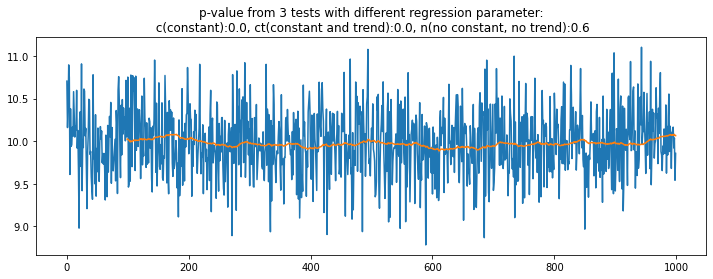

In [7]:
total_len = 1000
slope = 0.000

np.random.seed(0)
y = np.random.normal(10,0.4, total_len) + np.linspace(0, total_len*slope, total_len)

plt.figure(figsize=[12, 4]) 
plt.plot(y)
plt.plot(pd.Series(y).rolling(100).mean().dropna())
plt.title(f"p-value from 3 tests with different regression parameter:\n c(constant):{round(adfuller(y)[1],2)}, ct(constant and trend):{round(adfuller(y,regression='ct')[1],2)}, n(no constant, no trend):{round(adfuller(y,regression='n')[1],2)}")
plt.show()

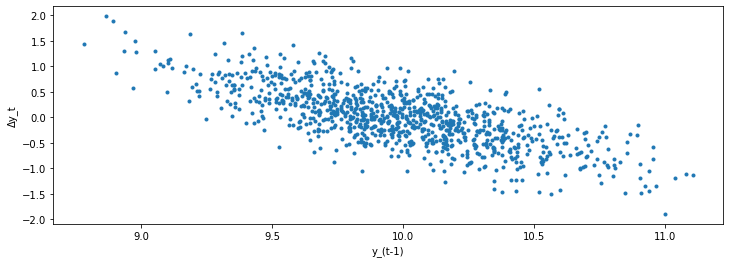

In [8]:
plt.figure(figsize=[12, 4]) 
train_X = y[:-1].reshape(-1,1)
train_y = pd.Series(y).diff().dropna().values
plt.plot(train_X,train_y,'.')
plt.ylabel('Δy_t')
plt.xlabel('y_(t-1)')
plt.show()

[-1.02607068] 10.241410985723206


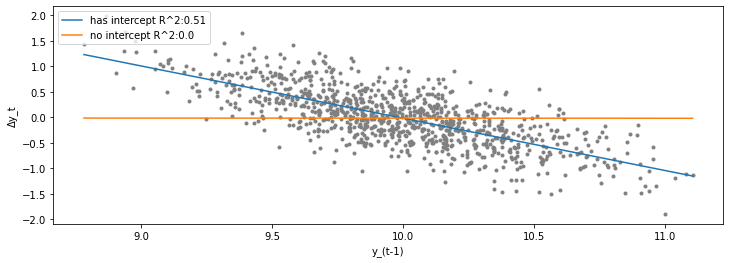

In [9]:
plt.figure(figsize=[12, 4]) 

plt.plot(train_X,train_y,'.',color='grey')
reg = LinearRegression().fit(train_X, train_y)
plt.plot([min(y[:-1]),max(y[:-1])],
         [min(y[:-1])*reg.coef_+reg.intercept_, max(y[:-1])*reg.coef_+reg.intercept_], 
         label=f'has intercept R^2:{round(reg.score(train_X, train_y),2)}')

print(reg.coef_, reg.intercept_)

reg = LinearRegression(fit_intercept=False).fit(train_X, train_y)
plt.plot([min(y[:-1]),max(y[:-1])],
         [min(y[:-1])*reg.coef_+reg.intercept_, max(y[:-1])*reg.coef_+reg.intercept_], 
         label=f'no intercept R^2:{round(reg.score(train_X, train_y),2)}')

plt.legend(loc='upper left')
plt.ylabel('Δy_t')
plt.xlabel('y_(t-1)')
plt.show()